In [2]:
#loading required R libraries 
library(quantmod)
library(plyr)
library(dplyr)
library(data.table)
library(corrgram)
library(corrplot)
defaultW <- getOption("warn") 
options(warn = -1) 

In [4]:
stocklist <- c("AAPL","GOOG","IBM","AMZN","AMD","FORD")
getSymbols(stocklist, from='2020-02-01',to='2020-06-01')
# To assign it from yahoo instead of Google
#getSymbols(stocklist,src="yahoo", auto.assign=FALSE, from='2020-02-01',to='2020-06-01')
options("getSymbols.warning4.0"=FALSE)

pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols


[1] "AAPL" "GOOG" "IBM"  "AMZN" "AMD"  "FORD"

In [5]:
#Merge the stock Details to form a portfolio
ibm<-as.data.table(Ad(IBM))
aapl<-as.data.table(Ad(AAPL))
goog<-as.data.table(Ad(GOOG))
amzn<-as.data.table(Ad(AMZN))
amd<-as.data.table(Ad(AMD))
ford<-as.data.table(Ad(FORD))
portfolio<-join_all(list(ibm,aapl,goog,amzn,amd,ford), by='index', type='left')
colnames(portfolio)<-c("Date","IBM","AAPL","GOOG","AMZN","AMD","FORD")
head(portfolio)


Date,IBM,AAPL,GOOG,AMZN,AMD,FORD
2020-02-03,142.8427,307.0979,1485.94,2004.20,48.02,1.08
2020-02-04,145.6162,317.2363,1447.07,2049.67,49.45,1.12
2020-02-05,152.6670,319.8232,1448.23,2039.87,49.84,1.14
2020-02-06,153.0869,323.5641,1476.23,2050.23,49.32,1.14
2020-02-07,151.3798,319.1660,1479.23,2079.28,49.73,1.12
2020-02-10,152.3863,320.6819,1508.68,2133.91,52.26,1.13


In [6]:
#Read Covid Data
dfcovid <- read.csv(file = 'data/Covid19_6June/covid_19_data.csv', header = TRUE)
dfcovid <- subset(dfcovid, select =c(Date,Confirmed,Deaths,Recovered))
dfcovid <- dfcovid %>% group_by(Date) %>% summarise_all(sum)
dfcovid$Date<-as.Date(dfcovid$Date)
dfcovid <- subset(dfcovid, Date >= as.Date("2020-02-01") & Date<= as.Date("2020-06-01"))
tail(dfcovid)


Date,Confirmed,Deaths,Recovered
2020-05-27,5691790,355629,2350088
2020-05-28,5808946,360308,2415960
2020-05-29,5924275,364867,2493535
2020-05-30,6059017,369126,2564693
2020-05-31,6166946,372035,2641329
2020-06-01,6265852,375543,2696009


In [7]:
#Merge Dataset of covid and Portfolio
dfcovidportfolio<-merge(portfolio,dfcovid, by = c("Date"))
df<-subset(dfcovidportfolio, select =-c(Date))
tail(dfcovidportfolio)

Date,IBM,AAPL,GOOG,AMZN,AMD,FORD,Confirmed,Deaths,Recovered
2020-05-21,119.12,316.85,1402.80,2446.74,54.65,1.16,5102424,332924,1948739
2020-05-22,118.39,318.89,1410.42,2436.88,55.17,1.29,5210817,338160,2056643
2020-05-26,121.76,316.73,1417.02,2421.86,53.19,1.17,5589626,350453,2286956
2020-05-27,125.54,318.11,1417.84,2410.39,52.74,1.18,5691790,355629,2350088
2020-05-28,124.53,318.25,1416.73,2401.10,51.74,1.22,5808946,360308,2415960
2020-05-29,124.90,317.94,1428.92,2442.37,53.80,1.22,5924275,364867,2493535


In [8]:
portfolio_scaled<-scale(subset(portfolio, select =-c(Date)))
head(portfolio_scaled)

IBM,AAPL,GOOG,AMZN,AMD,FORD
1.270115,0.7161926,1.325426,-0.574545560,-0.42680246,-0.007775759
1.450785,1.0818515,1.030929,-0.376013190,-0.14760085,0.629836466
1.910093,1.1751519,1.039718,-0.418801929,-0.07145520,0.948642579
1.937447,1.3100752,1.251859,-0.373567847,-0.17298299,0.948642579
1.826243,1.1514501,1.274588,-0.246728640,-0.09293223,0.629836466
1.891808,1.2061236,1.497716,-0.008201983,0.40103912,0.789239523


In [9]:
#Correlation Coefficient among variables
cor(df)

,IBM,AAPL,GOOG,AMZN,AMD,FORD,Confirmed,Deaths,Recovered
IBM,1.0000000,0.7880989,0.8943018,0.1894218,0.4976569,0.3477837,-0.2003654,-0.1855543,-0.1577844
AAPL,0.7880989,1.0000000,0.9613121,0.5912836,0.7201635,0.5767576,0.3491539,0.3606369,0.4065957
GOOG,0.8943018,0.9613121,1.0000000,0.4738084,0.6607058,0.5110819,0.1690337,0.1828707,0.2289418
AMZN,0.1894218,0.5912836,0.4738084,1.0000000,0.8678298,0.5809439,0.8426452,0.8600621,0.7953344
AMD,0.4976569,0.7201635,0.6607058,0.8678298,1.0000000,0.5546370,0.5354769,0.5559432,0.4910896
FORD,0.3477837,0.5767576,0.5110819,0.5809439,0.5546370,1.0000000,0.5094336,0.4871873,0.5297476
Confirmed,-0.2003654,0.3491539,0.1690337,0.8426452,0.5354769,0.5094336,1.0000000,0.9972291,0.9841875
Deaths,-0.1855543,0.3606369,0.1828707,0.8600621,0.5559432,0.4871873,0.9972291,1.0000000,0.9747287
Recovered,-0.1577844,0.4065957,0.2289418,0.7953344,0.4910896,0.5297476,0.9841875,0.9747287,1.0000000


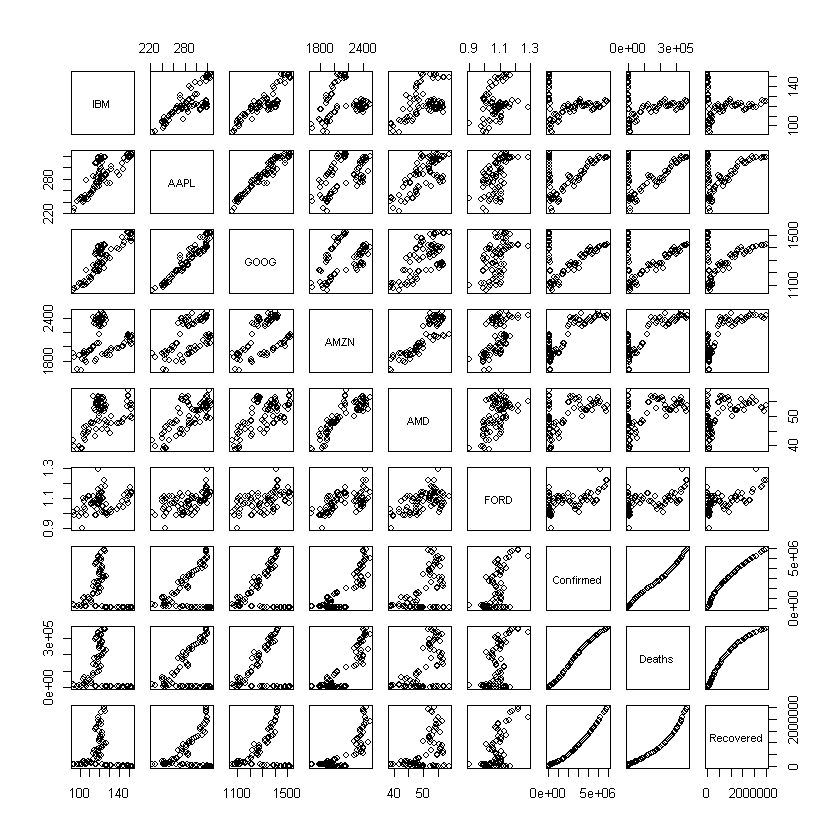

In [10]:
#Correlation Matrix Plot
pairs(df, pch = 21)

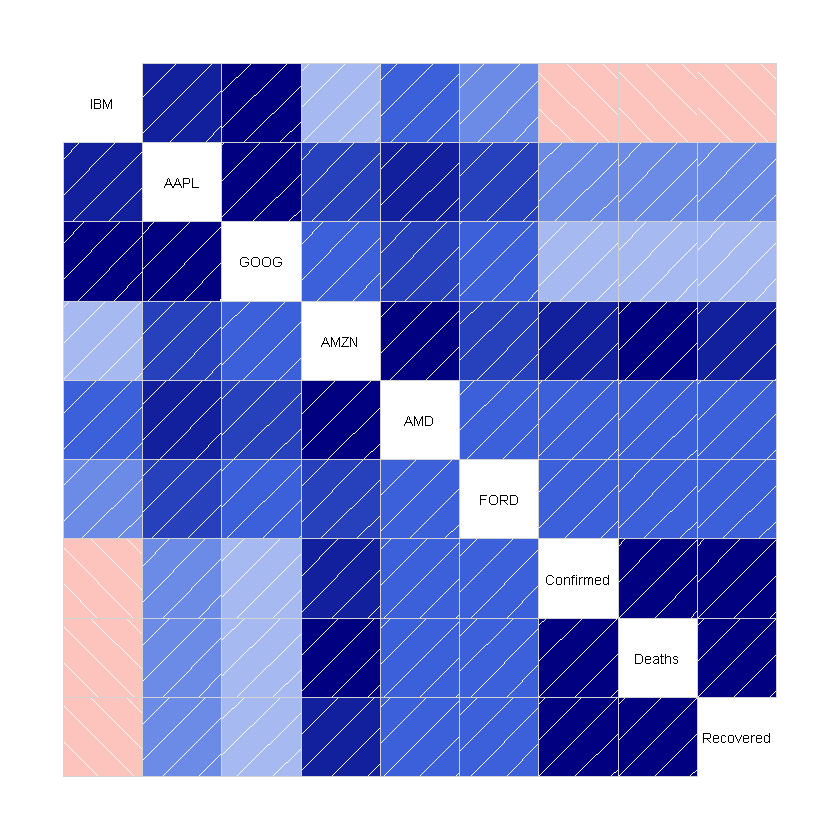

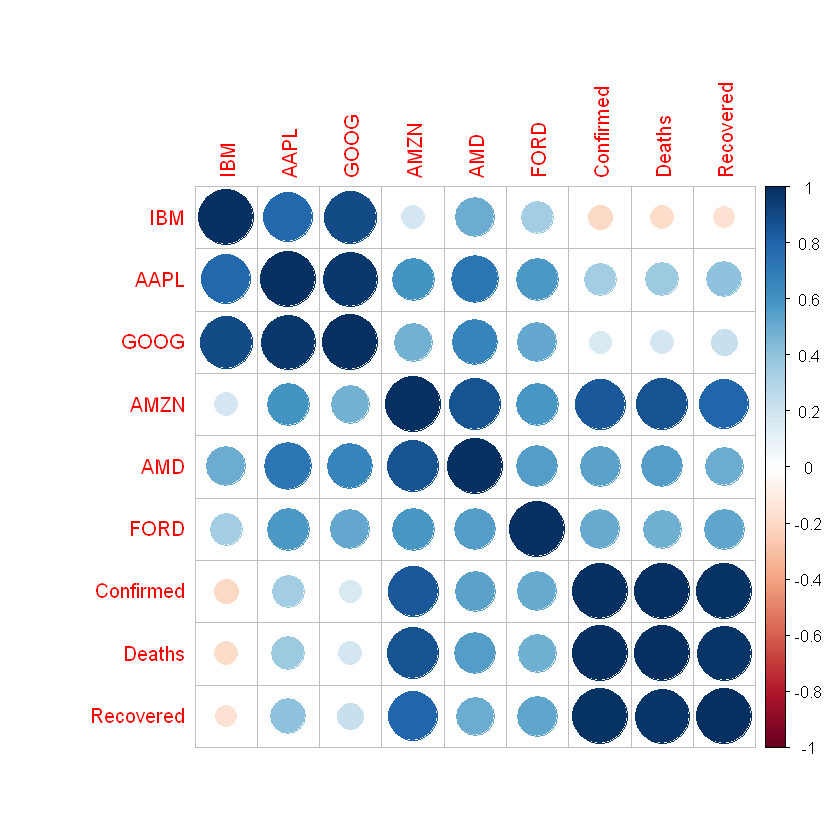

In [11]:
#Heatmap using Corrplot 
corrplot(corrgram(df))

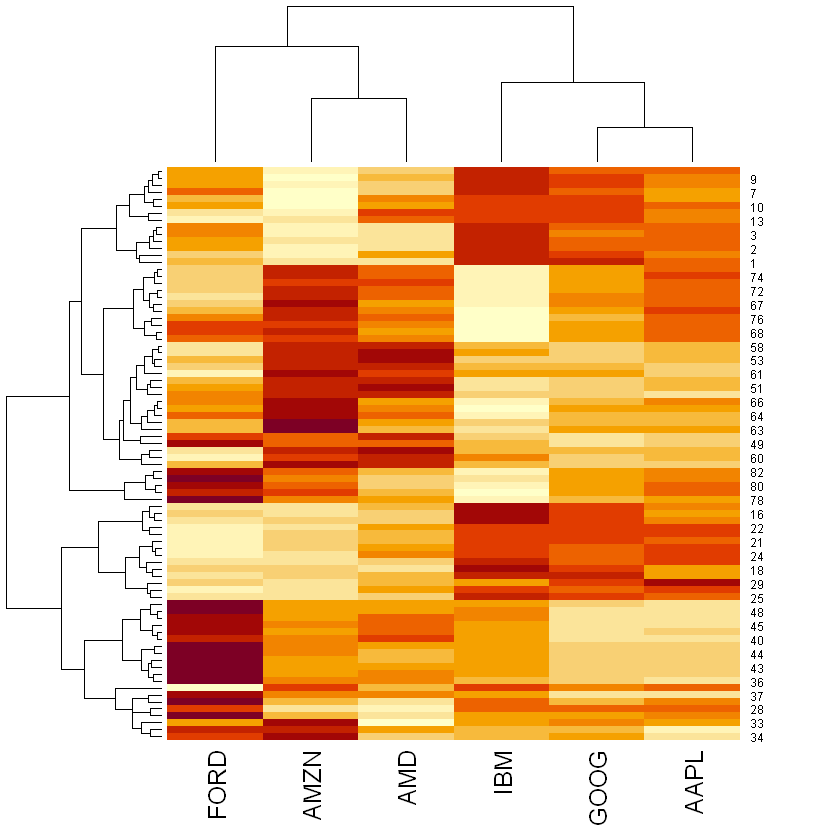

In [12]:
# Heatmap with heirchical clustering of portfolio
heatmap(as.matrix(portfolio_scaled), symm=FALSE)

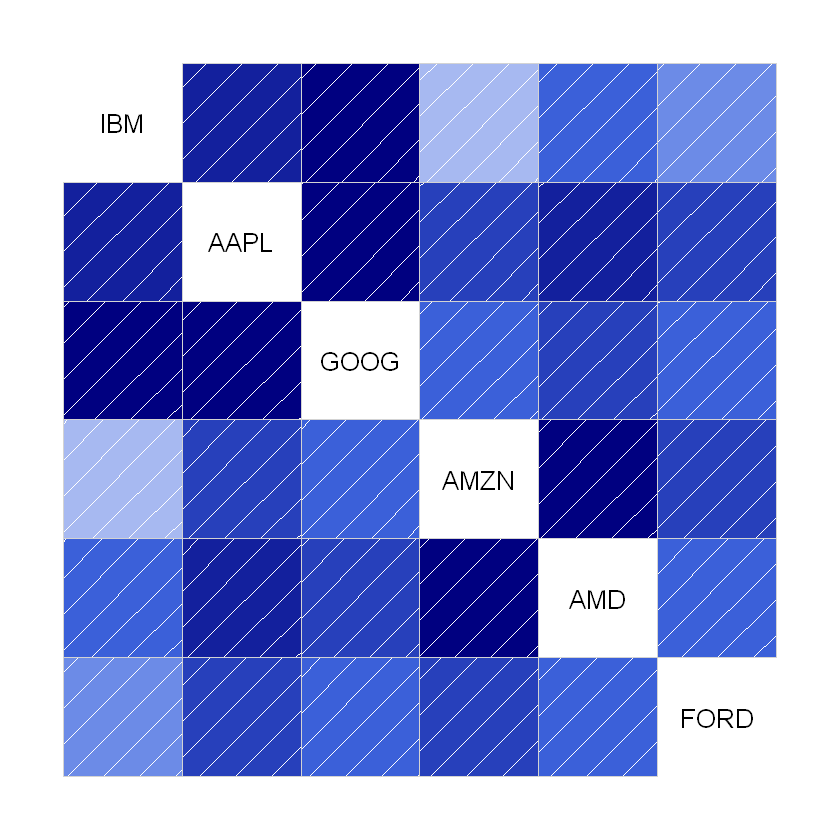

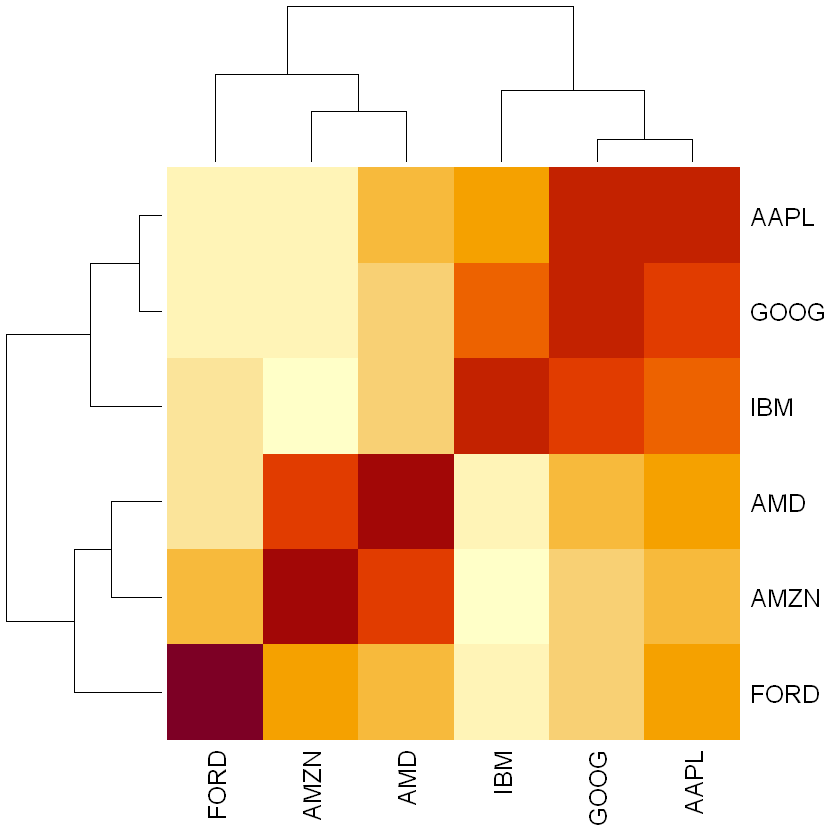

In [13]:
heatmap(corrgram(portfolio_scaled), symm=FALSE)